## Problem 2 - Polynomial Regression

Load the file 'regress1.mat' and plot Y as a function of X

Find a least-squares fit fo the data with polynomicals of order 0, 1, 2, 3, 4, and 5. ON a seperate graph, plot the squared error as a function of the order of polynomial

Polynomial regression follows the form of y = b0 + b1x + b2x**2 + b3x**3 ... bnx**n each additional term will match the data set even more closely allowing us to get a function that accurately represents our data

However, one issue with this method is that at some polynomial order, we find that the regression no longer describes our data properly

In [187]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt


In [188]:
 def lin_reg(x,y):
    
    u,s,v = la.svd(x,full_matrices = True)
    s = np.diag(s)
    
    Y_star = u.T@y
    B_ss = np.array([Y_star[1:len(s)],[0]])
    B_star = np.divide(B_ss[1:len(s)],s)
    b = v.T@B_star
    
    return b

In [189]:
mat = loadmat('regress1.mat')


In [190]:
x = mat['x'] # extracts the indenepent variable data
y = mat['y'] # extrasts the dependent variable data

x_max = np.size(x) # 

Begin with plotting Y as a function of X to see what the data looks like

Text(0, 0.5, 'Dependent Variable (Arbitrary Units)')

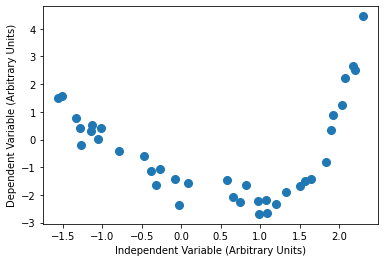

In [191]:
plt.plot(x,y,'o',markersize =8)
plt.xlabel('Independent Variable (Arbitrary Units)')
plt.ylabel('Dependent Variable (Arbitrary Units)')

# The data appears to take on a roughly parabolic shape. This indicates that a x**3 or x**4 will be a great fit

Using the SVD, we can get various beta terms to weight the polynomial terms resulting in a "best fit"

First, begin with creating a design matrix with terms up to x**5 (giving us a fifth order polynomial in the end)

In [192]:
x0 = np.ones([len(x),1])
x1 = x
x2 = x**2
x3 = x**3
x4 = x**4
x5 = x**5

design_matrix = np.concatenate((x5, x4, x3, x2, x1, x0), axis = 1)

In [193]:
np.shape(design_matrix)

(38, 6)

In [194]:
u,s,v = la.svd(design_matrix)
    
Y_star = u.T@y

B_ss = np.append(Y_star[0:len(s)],0)
B_star = np.divide(B_ss[0:len(s)],s)
beta = v@B_star

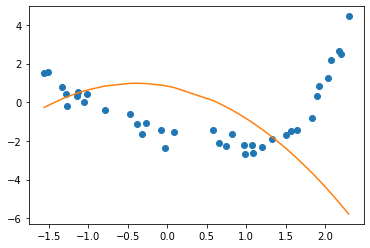

In [216]:
xregressionLine = x
y5 = beta[0]*xregressionLine**5 + beta[1]*xregressionLine**4 + beta[2]*xregressionLine**3 + beta[3]*xregressionLine**2 + beta[4]*xregressionLine + beta[5]

plt.plot(x,y,'o')
plt.plot(x,beta[5] + beta[4]*x + beta[3]*x**2)

In [185]:
beta

array([ 0.18965268, -0.82568121, -0.86550045, -0.92829068, -0.74241702,
        0.83667038])